In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from google.colab import files
from google.colab import drive
from PIL import Image
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import io
import pandas as pd



TensorFlow 2.x selected.


In [0]:
uploaded = files.upload()

Saving 44_UNIONEDEICOMUNIDIEMPOLI_20191105T1040.png to 44_UNIONEDEICOMUNIDIEMPOLI_20191105T1040.png


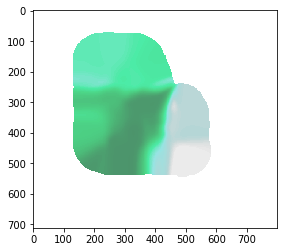

In [0]:
#img = mpimg.imread(io.BytesIO(uploaded['44_UNIONEDEICOMUNIDIEMPOLI_20191105T1040.png']))
plt.imshow(img)

In [0]:
uploaded = files.upload()

Saving 44_UNIONEDEICOMUNIDIEMPOLI_20190707T1205.png to 44_UNIONEDEICOMUNIDIEMPOLI_20190707T1205.png


In [0]:
img2 = mpimg.imread(io.BytesIO(uploaded['44_UNIONEDEICOMUNIDIEMPOLI_20190707T1205.png']))

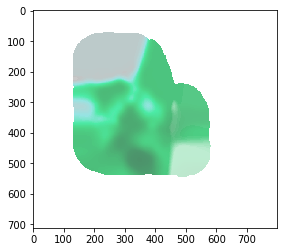

In [0]:
img2[:,:,3] = img[:,:,3]
plt.imshow(img2)

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [25]:
local_download_path = os.path.expanduser('/content/drive/My Drive/Images')
directory = []
for idx,filename in enumerate(os.listdir(local_download_path)): 
  directory.append(os.path.join(local_download_path,filename))
  print(directory[idx])
 

/content/drive/My Drive/Images/44_UNIONEDEICOMUNIDIEMPOLI_20190707T1130_RAINFALL
/content/drive/My Drive/Images/44_UNIONEDEICOMUNIDIEMPOLI_20191105T0950_RAINFALL
/content/drive/My Drive/Images/44_UNIONEDEICOMUNIDIEMPOLI_20191202T1300_RAINFALL


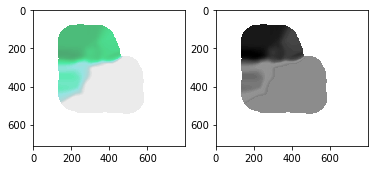

In [123]:
folder_2 = os.listdir(directory[1])
img = Image.open(os.path.join(directory[1],folder_2[20]))
#alpha = img[:,:,3]
plt.subplot(1,2,1)
plt.imshow(img)
alpha = img.getchannel('A')
#plt.imshow(Image.merge("RGBA",[img.getchannel('R'),img.getchannel('G'),img.getchannel('B'), alpha]))
img2 = img.convert("L")
plt.subplot(1,2,2)
plt.imshow(img2,"gray")

In [0]:
for images in os.listdir(directory[0]):
  img2 = Image.open(os.path.join(directory[0], images))
  img2 = Image.merge("RGBA",[img2.getchannel('R'),img2.getchannel('G'),img2.getchannel('B'),alpha])
  img2.save(os.path.join(directory[0], images))
  

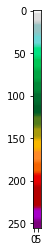

In [109]:
col_image_path = os.path.expanduser('/content/drive/My Drive/Images/colormap.png')
clrmp = Image.open(col_image_path)
clrmp.thumbnail((256,256),Image.ANTIALIAS)
clrmp.save(col_image_path)

In [193]:
clrmp = plt.imread(col_image_path)
table = clrmp[:,1,:]

TypeError: ignored

In [0]:
def clrmp_decode(im,table):
  gray = np.zeros_like(im[:,:,0])
  table = table*255
  table = table.round(0)
  im = im*255
  im = im.round(0)
  for x in range(im.shape[0]):
    for y in range(im.shape[1]):
      color = im[x,y]
      arr = abs (table - color)
      arr = arr[:,0]+arr[:,1]+arr[:,2]
      idx = np.where(arr == min(arr))[0][0]
      gray[x,y] = idx/255
  return gray


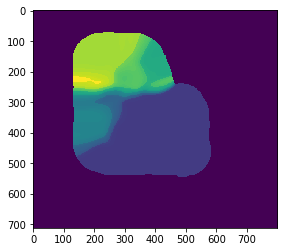

In [222]:
img = plt.imread(os.path.join(directory[1],folder_2[20]))
img = img[:,:,:3]
grayimg = clrmp_decode(img,table)
plt.imshow(grayimg)

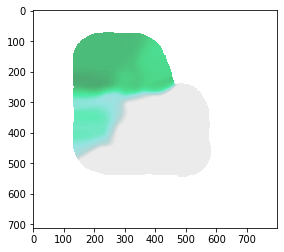

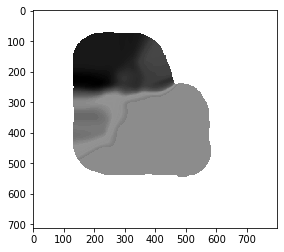

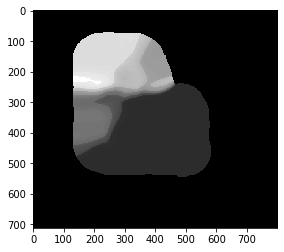

In [228]:
img3 = Image.open(os.path.join(directory[1],folder_2[20]))
plt.figure()
plt.imshow(img3)
plt.figure()
plt.imshow(img3.convert('L'),'gray')
plt.figure()
plt.imshow(grayimg,'gray')